# LG_aimers 해커톤 프로젝트

## 안정빈

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (예: 맑은 고딕)
rc('font', family='Malgun Gothic')

# 음수 기호 설정 (한글 폰트와 함께 깨지지 않도록 처리)
plt.rcParams['axes.unicode_minus'] = False



In [5]:
train = pd.read_csv('../data/train.csv') 
test = pd.read_csv('../data/test.csv') 

In [6]:
train.head()

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

## 3.EDA

### 1. 임신 성공 여부

In [10]:
train['배아 생성 주요 이유'].value_counts()

배아 생성 주요 이유
현재 시술용                 233732
배아 저장용                   9192
기증용, 현재 시술용              3784
난자 저장용                   1959
기증용                      1108
기증용, 배아 저장용               125
배아 저장용, 현재 시술용             83
기증용, 난자 저장용                44
기증용, 배아 저장용, 현재 시술용        20
난자 저장용, 배아 저장용              6
난자 저장용, 현재 시술용              5
연구용, 현재 시술용                 1
난자 저장용, 배아 저장용, 연구용         1
Name: count, dtype: int64

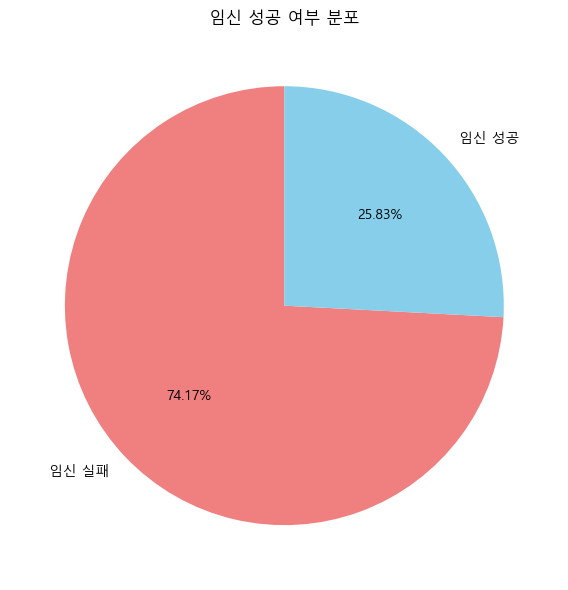

In [11]:
# '임신 성공 여부' 데이터 값과 개수 계산
success_counts = train['임신 성공 여부'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(success_counts, labels=['임신 실패','임신 성공'], autopct='%1.2f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('임신 성공 여부 분포')
plt.tight_layout()
plt.show()

전체 데이터를 보면 74.2%에 가까운 확률로 임신이 실패한 것을 알 수 있다.

### 2. 시술 당시 나이

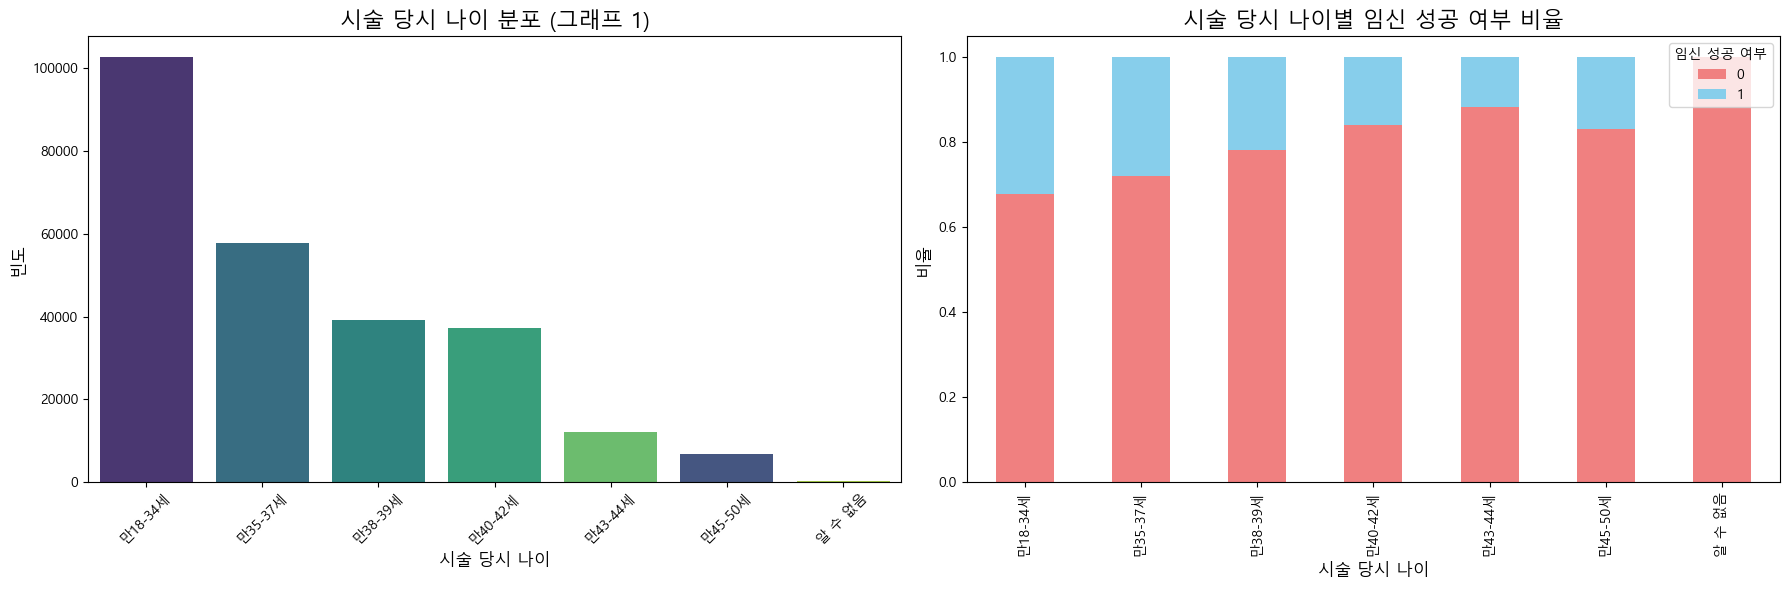

In [14]:
age_order = ['만18-34세', '만35-37세', '만38-39세', '만40-42세', '만43-44세', '만45-50세', '알 수 없음']

# '시술 당시 나이'와 '임신 성공 여부'에 따른 데이터 개수 계산
count_data = train.groupby(['시술 당시 나이', '임신 성공 여부']).size().unstack(fill_value=0)

# 각 나이대별로 임신 성공 여부의 비율 계산
percentage_data = count_data.div(count_data.sum(axis=1), axis=0)

# 나이 순서에 맞게 정렬
percentage_data = percentage_data.reindex(age_order)


fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

sns.countplot(data=train, x='시술 당시 나이', hue='시술 당시 나이', order=age_order, palette='viridis', ax=axes[0])
axes[0].set_title('시술 당시 나이 분포 (그래프 1)', fontsize=16)
axes[0].set_xlabel('시술 당시 나이', fontsize=12)
axes[0].set_ylabel('빈도', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


percentage_data.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'], ax=axes[1])
axes[1].set_title('시술 당시 나이별 임신 성공 여부 비율', fontsize=16)
axes[1].set_xlabel('시술 당시 나이', fontsize=12)
axes[1].set_ylabel('비율', fontsize=12)
axes[1].legend(title='임신 성공 여부', loc='upper right')


plt.tight_layout()
plt.show()


젊을수록, 임신 성공 확률이 높은 것을 알 수 있다.

### 3. 시술유형

In [17]:
train['시술 유형'].value_counts()

시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

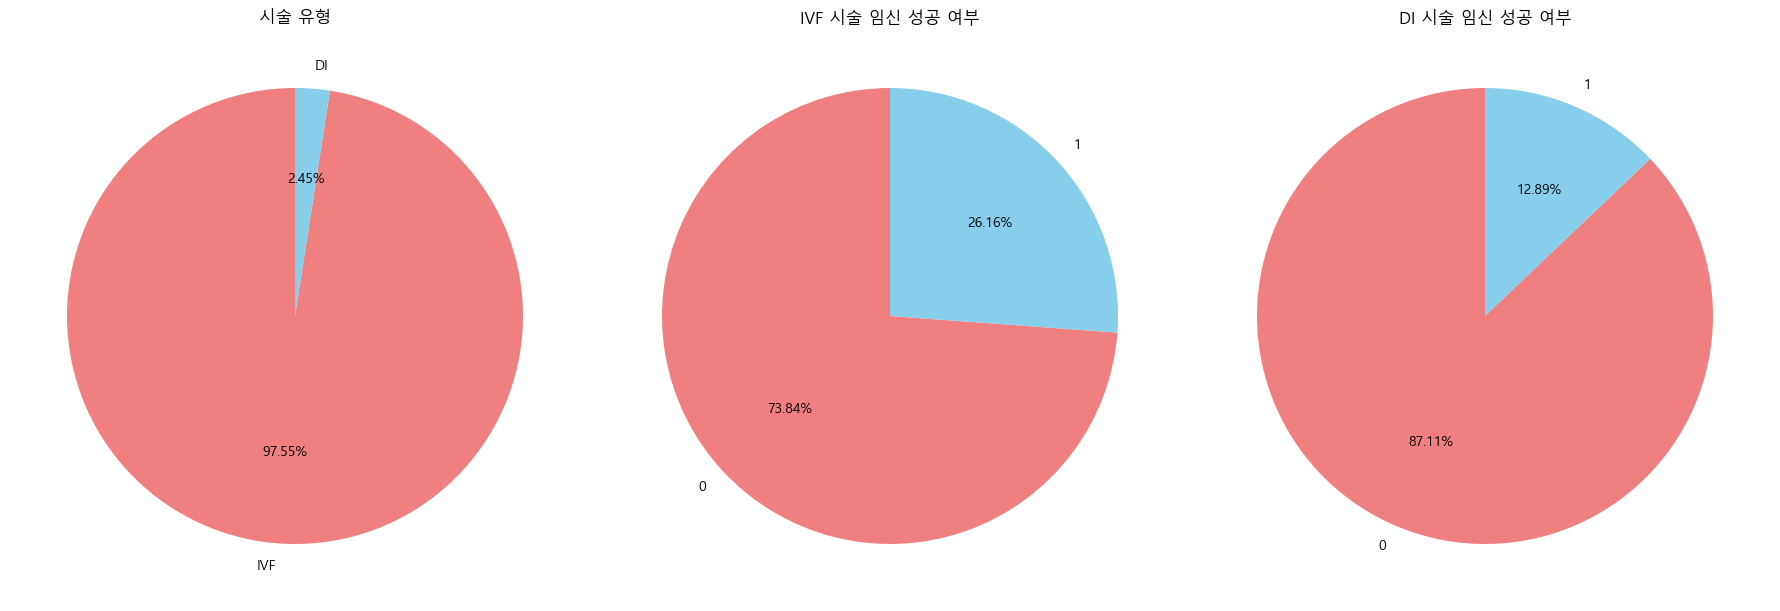

In [18]:
type_counts = train['시술 유형'].value_counts()
ivf=train[train['시술 유형']=='IVF']
di=train[train['시술 유형']=='DI']
ivf_counts=ivf['임신 성공 여부'].value_counts()
di_counts=di['임신 성공 여부'].value_counts()

fig, axes=plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'skyblue'])
axes[0].set_title('시술 유형')

axes[1].pie(ivf_counts, labels=ivf_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'skyblue'])
axes[1].set_title('IVF 시술 임신 성공 여부')

axes[2].pie(di_counts, labels=di_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'skyblue'])
axes[2].set_title('DI 시술 임신 성공 여부')

plt.tight_layout()
plt.show()

대부분의 사람들이 IVF 시술을 받았고, IVF 시술의 임신 성공 확률이 DI 시술에 비해 높은 확률을 보이고 있다.

### 4. 특정 시술 유형

In [21]:
train['특정 시술 유형'].value_counts()

특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
GIFT                                        2
IVF / AH:ICSI / AH       

### 5. 배란 자극 여부

In [23]:
train['배란 자극 여부'].value_counts()

배란 자극 여부
1    197720
0     58631
Name: count, dtype: int64

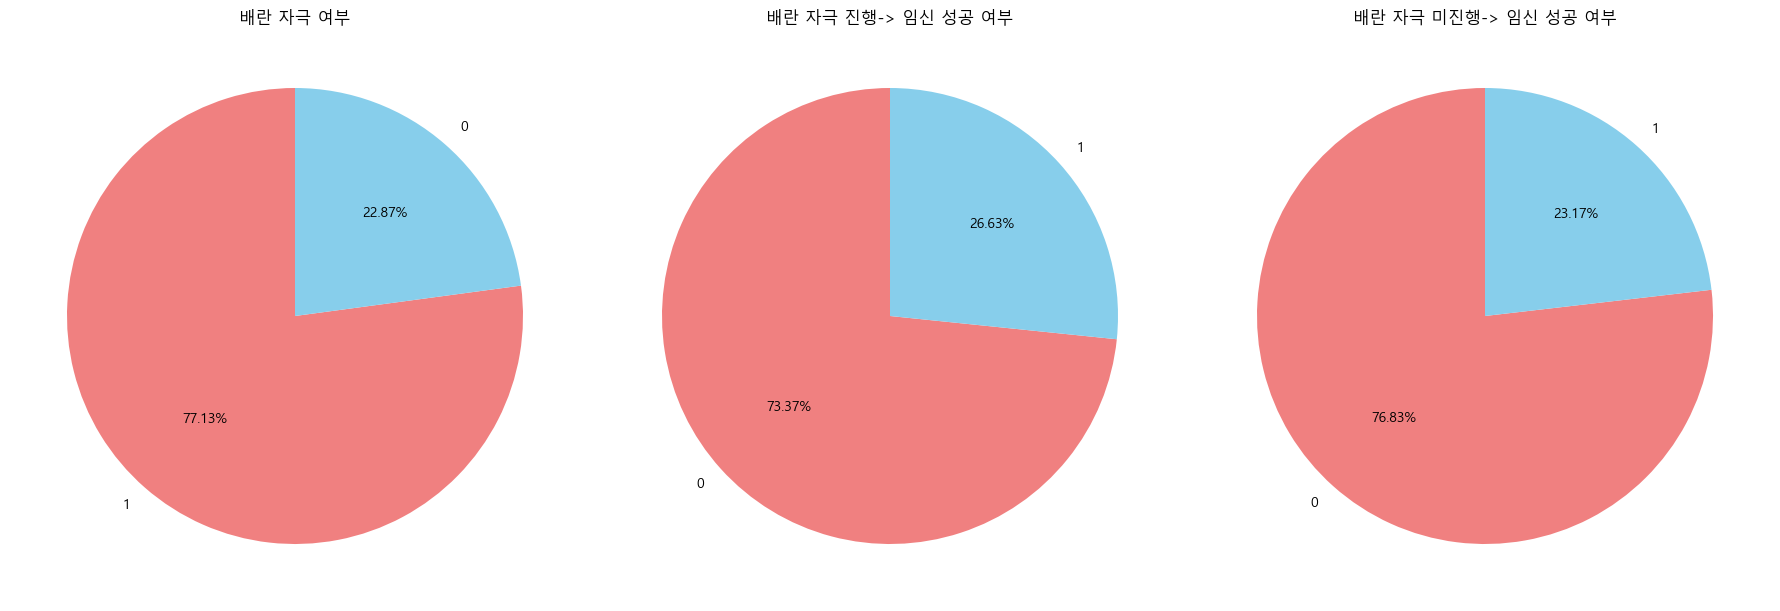

In [24]:
type_counts = train['배란 자극 여부'].value_counts()
true=train[train['배란 자극 여부']==1]
false=train[train['배란 자극 여부']==0]
true_counts=true['임신 성공 여부'].value_counts()
false_counts=false['임신 성공 여부'].value_counts()

fig, axes=plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(type_counts, labels=type_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'skyblue'])
axes[0].set_title('배란 자극 여부')

axes[1].pie(true_counts, labels=true_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'skyblue'])
axes[1].set_title('배란 자극 진행-> 임신 성공 여부')

axes[2].pie(false_counts, labels=false_counts.index, autopct='%1.2f%%', startangle=90, 
        colors=['lightcoral', 'skyblue'])
axes[2].set_title('배란 자극 미진행-> 임신 성공 여부')

plt.tight_layout()
plt.show()

첫 번째 그래프의 1은 배란 자극을 시행한 경우이며, 0은 시행하지 않은 경우를 의미한다. 77.1%의 환자는 배란 자극을 진행하였고, 배란 자극을 진행한 환자의 임신 성공 확률이 진행하지 않은 환자에 비해 3%정도 높게 나타나는 것을 알 수 있다.

### 6. 배란 유도 유형

In [27]:
train['배란 유도 유형'].value_counts()

배란 유도 유형
기록되지 않은 시행      194432
알 수 없음           61917
세트로타이드 (억제제)         1
생식선 자극 호르몬           1
Name: count, dtype: int64

In [28]:
a=train[train['배란 자극 여부']==0]
a['배란 유도 유형'].value_counts()

배란 유도 유형
알 수 없음    58631
Name: count, dtype: int64

## 4. 결측치 대체

In [30]:
# 결측치가 존재하는 열과 개수 출력
train_missing_values = train.isnull().sum()
train_missing_columns = train_missing_values[train_missing_values > 0]  # 결측치가 있는 열만 필터링

print(train_missing_columns)

임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: i

In [31]:
# 결측치가 존재하는 열과 개수 출력
test_missing_values = test.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]  # 결측치가 있는 열만 필터링

print(test_missing_columns)

임신 시도 또는 마지막 임신 경과 연수    86770
단일 배아 이식 여부               2176
착상 전 유전 검사 사용 여부         89134
착상 전 유전 진단 사용 여부          2176
배아 생성 주요 이유               2176
총 생성 배아 수                 2176
미세주입된 난자 수                2176
미세주입에서 생성된 배아 수           2176
이식된 배아 수                  2176
미세주입 배아 이식 수              2176
저장된 배아 수                  2176
미세주입 후 저장된 배아 수           2176
해동된 배아 수                  2176
해동 난자 수                   2176
수집된 신선 난자 수               2176
저장된 신선 난자 수               2176
혼합된 난자 수                  2176
파트너 정자와 혼합된 난자 수          2176
기증자 정자와 혼합된 난자 수          2176
동결 배아 사용 여부               2176
신선 배아 사용 여부               2176
기증 배아 사용 여부               2176
대리모 여부                    2176
PGD 시술 여부                89286
PGS 시술 여부                89396
난자 채취 경과일                19949
난자 해동 경과일                89575
난자 혼합 경과일                18579
배아 이식 경과일                15246
배아 해동 경과일                76117
dtype: int64


### 1. 임신 시도 또는 마지막 임신 경과 연수

In [33]:
train.drop(columns=['임신 시도 또는 마지막 임신 경과 연수'], inplace=True)  
test.drop(columns=['임신 시도 또는 마지막 임신 경과 연수'], inplace=True)  

### 2. 특정 시술 유형

In [35]:
train['특정 시술 유형'].value_counts()

특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
GIFT                                        2
IVF / AH:ICSI / AH       

In [36]:
train['특정 시술 유형'].fillna('UnKnown', inplace=True)
test['특정 시술 유형'].fillna('UnKnown', inplace=True)

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_13404\814923478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['특정 시술 유형'].fillna('UnKnown', inplace=True)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_13404\814923478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

### 3. 착상 전 유전 검사 사용 여부

In [38]:
train.drop(columns=['착상 전 유전 검사 사용 여부'], inplace=True)  
test.drop(columns=['착상 전 유전 검사 사용 여부'], inplace=True)  

### 4. PGD 시술 여부

In [40]:
train.drop(columns=['PGD 시술 여부'], inplace=True)  
test.drop(columns=['PGD 시술 여부'], inplace=True)  

### 5. PGS 시술 여부

In [42]:
train.drop(columns=['PGS 시술 여부'], inplace=True)  
test.drop(columns=['PGS 시술 여부'], inplace=True)  

### 6. 난자 해동 경과일

In [44]:
train.drop(columns=['난자 해동 경과일'], inplace=True) 
test.drop(columns=['난자 해동 경과일'], inplace=True)  

### 7.배아 해동 경과일

In [46]:
train.drop(columns=['배아 해동 경과일'], inplace=True)  
test.drop(columns=['배아 해동 경과일'], inplace=True)  

### 8. 난자 채취 경과일

In [48]:
train['난자 채취 경과일'].value_counts()

난자 채취 경과일
0.0    198863
Name: count, dtype: int64

In [49]:
train['난자 채취 경과일'] = train['난자 채취 경과일'].fillna(train['난자 채취 경과일'].mode()[0])
test['난자 채취 경과일'] = test['난자 채취 경과일'].fillna(train['난자 채취 경과일'].mode()[0])

### 9. 난자 혼합 경과일

In [51]:
train['난자 혼합 경과일'].value_counts()

난자 혼합 경과일
0.0    201920
1.0       488
2.0       102
3.0        68
5.0        24
6.0         8
4.0         5
7.0         1
Name: count, dtype: int64

In [52]:
train['난자 혼합 경과일'] = train['난자 혼합 경과일'].fillna(train['난자 혼합 경과일'].mode()[0])
test['난자 혼합 경과일'] = test['난자 혼합 경과일'].fillna(train['난자 혼합 경과일'].mode()[0])

### 10. 배아 이식 경과일

In [54]:
train['배아 이식 경과일'].value_counts().sort_index()

배아 이식 경과일
0.0    24904
1.0     6053
2.0    35078
3.0    57924
4.0     4504
5.0    81459
6.0     2773
7.0       90
Name: count, dtype: int64

In [55]:
train['배아 이식 경과일'] = train['배아 이식 경과일'].fillna(train['배아 이식 경과일'].mode()[0])
test['배아 이식 경과일'] = test['배아 이식 경과일'].fillna(train['배아 이식 경과일'].mode()[0])


In [56]:
# 결측치가 존재하는 열과 개수 출력
train_missing_values = train.isnull().sum()
train_missing_columns = train_missing_values[train_missing_values > 0]  # 결측치가 있는 열만 필터링

print(train_missing_columns)

단일 배아 이식 여부         6291
착상 전 유전 진단 사용 여부    6291
배아 생성 주요 이유         6291
총 생성 배아 수           6291
미세주입된 난자 수          6291
미세주입에서 생성된 배아 수     6291
이식된 배아 수            6291
미세주입 배아 이식 수        6291
저장된 배아 수            6291
미세주입 후 저장된 배아 수     6291
해동된 배아 수            6291
해동 난자 수             6291
수집된 신선 난자 수         6291
저장된 신선 난자 수         6291
혼합된 난자 수            6291
파트너 정자와 혼합된 난자 수    6291
기증자 정자와 혼합된 난자 수    6291
동결 배아 사용 여부         6291
신선 배아 사용 여부         6291
기증 배아 사용 여부         6291
대리모 여부              6291
dtype: int64


In [57]:
# 결측치가 존재하는 열과 개수 출력
test_missing_values = test.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]  # 결측치가 있는 열만 필터링

print(test_missing_columns)

단일 배아 이식 여부         2176
착상 전 유전 진단 사용 여부    2176
배아 생성 주요 이유         2176
총 생성 배아 수           2176
미세주입된 난자 수          2176
미세주입에서 생성된 배아 수     2176
이식된 배아 수            2176
미세주입 배아 이식 수        2176
저장된 배아 수            2176
미세주입 후 저장된 배아 수     2176
해동된 배아 수            2176
해동 난자 수             2176
수집된 신선 난자 수         2176
저장된 신선 난자 수         2176
혼합된 난자 수            2176
파트너 정자와 혼합된 난자 수    2176
기증자 정자와 혼합된 난자 수    2176
동결 배아 사용 여부         2176
신선 배아 사용 여부         2176
기증 배아 사용 여부         2176
대리모 여부              2176
dtype: int64


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 63 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  256351 non-null  object 
 1   시술 시기 코드            256351 non-null  object 
 2   시술 당시 나이            256351 non-null  object 
 3   시술 유형               256351 non-null  object 
 4   특정 시술 유형            256351 non-null  object 
 5   배란 자극 여부            256351 non-null  int64  
 6   배란 유도 유형            256351 non-null  object 
 7   단일 배아 이식 여부         250060 non-null  float64
 8   착상 전 유전 진단 사용 여부    250060 non-null  float64
 9   남성 주 불임 원인          256351 non-null  int64  
 10  남성 부 불임 원인          256351 non-null  int64  
 11  여성 주 불임 원인          256351 non-null  int64  
 12  여성 부 불임 원인          256351 non-null  int64  
 13  부부 주 불임 원인          256351 non-null  int64  
 14  부부 부 불임 원인          256351 non-null  int64  
 15  불명확 불임 원인           256351 non-nul

In [59]:
train.fillna(train.mode().iloc[0], inplace=True)
test.fillna(train.mode().iloc[0], inplace=True)

## 5. 모델 학습

In [61]:
pip install xgboost

In [62]:
pip install lightgbm

^C
Note: you may need to restart the kernel to use updated packages.


In [63]:
df = train.copy()

In [64]:
# 각 컬럼에서 숫자로 변환할 수 없는 값 확인
for col in [ '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
            'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 기증자 나이', '정자 기증자 나이']:
    # 변환할 수 없는 값 찾기
    invalid_values = df[col][pd.to_numeric(df[col], errors='coerce').isna()]
    if len(invalid_values) > 0:
        print(f"train 컬럼 '{col}'에 숫자로 변환할 수 없는 값이 있습니다:")
        print(invalid_values.unique())


train 컬럼 '총 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '6회 이상' '3회' '4회' '5회']
train 컬럼 '클리닉 내 총 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '6회 이상' '3회' '5회' '4회']
train 컬럼 'IVF 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '5회' '4회' '6회 이상']
train 컬럼 'DI 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '5회' '3회' '1회' '2회' '4회' '6회 이상']
train 컬럼 '총 임신 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회' '6회 이상']
train 컬럼 'IVF 임신 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회' '6회 이상']
train 컬럼 'DI 임신 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회']
train 컬럼 '총 출산 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '6회 이상' '5회']
train 컬럼 'IVF 출산 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회']
train 컬럼 'DI 출산 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '5회']
train 컬럼 '난자 기증자 나이'에 숫자로 변환할 수 없는 값이 있습니다:
['알 수 없음' '만21-25세' '만31-35세' '만26-30세' '만20세 이하']
train 컬럼 '정자 기증자 나이'에 숫자로 변환할 수 없는 값이 있습니다:
['알 수 없음' '만26-30세' '만21-25세' '만41-45세' '만36-40세' '만31-

In [65]:
    # 변환할 수 없는 값 찾기
    invalid_values = test[col][pd.to_numeric(test[col], errors='coerce').isna()]
    if len(invalid_values) > 0:
        print(f"test 컬럼 '{col}'에 숫자로 변환할 수 없는 값이 있습니다:")
        print(invalid_values.unique())

test 컬럼 '정자 기증자 나이'에 숫자로 변환할 수 없는 값이 있습니다:
['알 수 없음' '만36-40세' '만31-35세' '만41-45세' '만26-30세' '만21-25세' '만20세 이하']


In [66]:
# 숫자로 변환할 수 없는 값들 처리
def convert_to_numeric(value):
    # '회'를 제거하고 숫자로 변환
    if isinstance(value, str):
        value = value.replace('회', '').replace('회 이상', '6')  # '6회 이상'을 6으로 변경
        try:
            return float(value)  # 숫자로 변환
        except ValueError:
            return None  # 변환할 수 없으면 None 반환
    return value

# 해당 컬럼들을 변환
for col in ['총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
            'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수']:
    df[col] = df[col].apply(convert_to_numeric)

# '난자 기증자 나이'와 '정자 기증자 나이' 처리
def age_to_numeric(value):
    if isinstance(value, str):
        if value == '알 수 없음':
            return None  # '알 수 없음'은 NaN으로 처리
        age_groups = {
            '만20세 이하': 20,
            '만21-25세': 23,
            '만26-30세': 28,
            '만31-35세': 33,
            '만36-40세': 38,
            '만41-45세': 43
        }
        return age_groups.get(value, None)  # 해당 연령대의 중앙값을 반환
    return value

df['난자 기증자 나이'] = df['난자 기증자 나이'].apply(age_to_numeric)
df['정자 기증자 나이'] = df['정자 기증자 나이'].apply(age_to_numeric)

# NaN 값이 있는지 다시 확인
print(df.isna().sum())


ID           0
시술 시기 코드     0
시술 당시 나이     0
시술 유형        0
특정 시술 유형     0
            ..
대리모 여부       0
난자 채취 경과일    0
난자 혼합 경과일    0
배아 이식 경과일    0
임신 성공 여부     0
Length: 63, dtype: int64


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 데이터 로드
df = train.copy()  # 데이터 파일명 변경 필요

# 불필요한 ID 컬럼 제거
df.drop(columns=['ID'], inplace=True)
df.drop(columns=['시술 시기 코드'], inplace=True)

# 숫자형으로 변환할 수 있는 object 타입 컬럼 변환 (변환 불가한 값은 NaN 처리)
for col in [ '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
            'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 기증자 나이', '정자 기증자 나이']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 변환할 수 없으면 NaN 처리

# 범주형 데이터 LabelEncoding 처리 (OneHotEncoding이 아닌)
le = LabelEncoder()
for col in ['시술 유형', '특정 시술 유형', '배란 유도 유형', '배아 생성 주요 이유', '난자 출처', '정자 출처','시술 당시 나이']:
    df[col] = le.fit_transform(df[col].astype(str))  # Label Encoding을 위해 객체형을 문자열로 변환

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

# 데이터 분할
X = df.drop(columns=['임신 성공 여부'])
y = df['임신 성공 여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 평가
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"{model.__class__.__name__}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}\n")

# 모델 리스트
models = [RandomForestClassifier(), XGBClassifier(use_label_encoder=False, eval_metric='logloss'), LGBMClassifier()]

# 모델 성능 비교
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test)


C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_13404\1995634058.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean

RandomForestClassifier:
Accuracy: 0.7106
F1 Score: 0.3126
ROC AUC Score: 0.6745



C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:37:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier:
Accuracy: 0.7455
F1 Score: 0.2039
ROC AUC Score: 0.7318

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051521
[LightGBM] [Info] Start training from score -1.051521
LGBMClassifier:
Accuracy: 0.7476
F1 Score: 0.1730
ROC AUC Score: 0.7343



In [68]:
# LightGBM 모델 정의 및 학습
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # ROC AUC 평가를 위한 확률값

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 53102, number of negative: 151978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 205080, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258933 -> initscore=-1.051521
[LightGBM] [Info] Start training from score -1.051521
Accuracy: 0.7476
F1 Score: 0.1730
ROC AUC Score: 0.7343


In [69]:
# 각 컬럼에서 숫자로 변환할 수 없는 값 확인
for col in [ '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
            'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 기증자 나이', '정자 기증자 나이']:
    # 변환할 수 없는 값 찾기
    invalid_values = test[col][pd.to_numeric(test[col], errors='coerce').isna()]
    if len(invalid_values) > 0:
        print(f"컬럼 '{col}'에 숫자로 변환할 수 없는 값이 있습니다:")
        print(invalid_values.unique())

컬럼 '총 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['1회' '0회' '3회' '5회' '2회' '4회' '6회 이상']
컬럼 '클리닉 내 총 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['1회' '0회' '3회' '5회' '2회' '4회' '6회 이상']
컬럼 'IVF 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['1회' '0회' '5회' '2회' '4회' '3회' '6회 이상']
컬럼 'DI 시술 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '2회' '1회' '3회' '5회' '4회' '6회 이상']
컬럼 '총 임신 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회' '6회 이상']
컬럼 'IVF 임신 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회']
컬럼 'DI 임신 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '4회' '5회']
컬럼 '총 출산 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '4회' '3회' '6회 이상']
컬럼 'IVF 출산 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '4회' '3회']
컬럼 'DI 출산 횟수'에 숫자로 변환할 수 없는 값이 있습니다:
['0회' '1회' '2회' '3회' '5회']
컬럼 '난자 기증자 나이'에 숫자로 변환할 수 없는 값이 있습니다:
['알 수 없음' '만26-30세' '만21-25세' '만31-35세' '만20세 이하']
컬럼 '정자 기증자 나이'에 숫자로 변환할 수 없는 값이 있습니다:
['알 수 없음' '만36-40세' '만31-35세' '만41-45세' '만26-30세' '만21-25세' '만20세 이하']


In [70]:
# 숫자로 변환할 수 없는 값들 처리
def convert_to_numeric(value):
    # '회'를 제거하고 숫자로 변환
    if isinstance(value, str):
        value = value.replace('회', '').replace('회 이상', '6')  # '6회 이상'을 6으로 변경
        try:
            return float(value)  # 숫자로 변환
        except ValueError:
            return None  # 변환할 수 없으면 None 반환
    return value

# 해당 컬럼들을 변환
for col in ['총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
            'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수']:
    test[col] = test[col].apply(convert_to_numeric)

# '난자 기증자 나이'와 '정자 기증자 나이' 처리
def age_to_numeric(value):
    if isinstance(value, str):
        if value == '알 수 없음':
            return None  # '알 수 없음'은 NaN으로 처리
        age_groups = {
            '만20세 이하': 20,
            '만21-25세': 23,
            '만26-30세': 28,
            '만31-35세': 33,
            '만36-40세': 38,
            '만41-45세': 43
        }
        return age_groups.get(value, None)  # 해당 연령대의 중앙값을 반환
    return value

test['난자 기증자 나이'] = test['난자 기증자 나이'].apply(age_to_numeric)
test['정자 기증자 나이'] = test['정자 기증자 나이'].apply(age_to_numeric)

# NaN 값이 있는지 다시 확인
print(test.isna().sum())

ID             0
시술 시기 코드       0
시술 당시 나이       0
시술 유형          0
특정 시술 유형       0
              ..
기증 배아 사용 여부    0
대리모 여부         0
난자 채취 경과일      0
난자 혼합 경과일      0
배아 이식 경과일      0
Length: 62, dtype: int64


In [71]:
# 불필요한 ID 컬럼 제거
test_c=test.copy()
test.drop(columns=['ID'], inplace=True)
test.drop(columns=['시술 시기 코드'], inplace=True)

# 숫자형으로 변환할 수 있는 object 타입 컬럼 변환 (변환 불가한 값은 NaN 처리)
for col in [ '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
            'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '난자 기증자 나이', '정자 기증자 나이']:
    test[col] = pd.to_numeric(test[col], errors='coerce')  # 변환할 수 없으면 NaN 처리

# 범주형 데이터 LabelEncoding 처리 (OneHotEncoding이 아닌)
le = LabelEncoder()
for col in ['시술 유형', '특정 시술 유형', '배란 유도 유형', '배아 생성 주요 이유', '난자 출처', '정자 출처','시술 당시 나이']:
    test[col] = le.fit_transform(test[col].astype(str))  # Label Encoding을 위해 객체형을 문자열로 변환

for col in test.columns:
    if test[col].isnull().sum() > 0:
        if test[col].dtype == 'object':
            test[col].fillna(df[col].mode()[0], inplace=True)
        else:
            test[col].fillna(df[col].median(), inplace=True)


C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\jeongbin\AppData\Local\Temp\ipykernel_13404\3728999842.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(df[col].median(), inplace=True)
C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanme

In [72]:
pred = model.predict_proba(test)[:, 1]  # 클래스 1(임신 성공) 확률만 선택
test_c['probability'] = pred


In [73]:
test_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90067 entries, 0 to 90066
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  90067 non-null  object 
 1   시술 시기 코드            90067 non-null  object 
 2   시술 당시 나이            90067 non-null  object 
 3   시술 유형               90067 non-null  object 
 4   특정 시술 유형            90067 non-null  object 
 5   배란 자극 여부            90067 non-null  int64  
 6   배란 유도 유형            90067 non-null  object 
 7   단일 배아 이식 여부         90067 non-null  float64
 8   착상 전 유전 진단 사용 여부    90067 non-null  float64
 9   남성 주 불임 원인          90067 non-null  int64  
 10  남성 부 불임 원인          90067 non-null  int64  
 11  여성 주 불임 원인          90067 non-null  int64  
 12  여성 부 불임 원인          90067 non-null  int64  
 13  부부 주 불임 원인          90067 non-null  int64  
 14  부부 부 불임 원인          90067 non-null  int64  
 15  불명확 불임 원인           90067 non-null  int64  
 16  불임 원

In [74]:
test_c = test_c[['ID', 'probability']]

In [75]:
test_c.head()

,ID,probability
0,TEST_00000,0.000459
1,TEST_00001,0.000588
2,TEST_00002,0.141150
3,TEST_00003,0.122576
4,TEST_00004,0.545300


In [76]:
test_c.to_csv('predictions2.csv', index=False)
